Text Normalization

In [1]:
#text input
paragraph = """
Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal
"""
print(paragraph.lower())


taj mahal is one of the beautiful monuments. it is one of the wonders of the world. it was built by shah jahan in 1631 in memory of his third beloved wife mumtaj mahal



Tokenization

In [3]:
#before tokenization, import nltk and download requires files
import nltk

#download punkt
nltk.download('punkt')

#download stopwords
nltk.download('stopwords')

#download wordnet
nltk.download('wordnet')

#download average_preceptron_tagger
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
from nltk.tokenize import sent_tokenize
paragraph = """
Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal
"""
tokenized_sentences = sent_tokenize(paragraph)
print(tokenized_sentences)

['\nTaj Mahal is one of the beautiful monuments.', 'It is one of the wonders of the world.', 'It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal']


In [18]:
#tokenized sentences with spacy
import spacy

nlp = spacy.load("en_core_web_sm")

#create nlp pipe using sentencizer
#append the sentencizer pipe to the nlp pipeline
sent_pipe = nlp.add_pipe('sentencizer')
paragraph = """
Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal
"""

#create nlp obj to handle linguistic annoatation in a documents
nlp_doc = nlp(paragraph)

#generate tokenize sentence
tokenized_sentences = []
for sentence in nlp_doc.sents:
    tokenized_sentences.append(sentence.text)
print(tokenized_sentences)

['\nTaj Mahal is one of the beautiful monuments.', 'It is one of the wonders of the world.', 'It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal\n']


In [19]:
#Tokenize paragraph into words using word_tokenize
from nltk.tokenize import word_tokenize
paragraph = """
Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal
"""
#split paragraph into words
tokenized_word = word_tokenize(paragraph)
print(tokenized_word)

['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal']


In [21]:
#tokenize with spacy
import spacy
nlp = spacy.load('en_core_web_sm')

paragraph = """
Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal
"""

#create nlp obj
my_doc = nlp(paragraph)

#tokenize paragraph into words
tokenized_words = []
for token in my_doc:
    tokenized_words.append(token.text)
print(tokenized_words)

['\n', 'Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '\n']


In [22]:
#frequency distribution of tokenized words

#import freqdist
from nltk.probability import FreqDist

#find freq dist of paragraph
fdist = FreqDist(tokenized_words)

#check top 5 common words
fdist.most_common(5)


[('of', 4), ('the', 3), ('\n', 2), ('Mahal', 2), ('is', 2)]

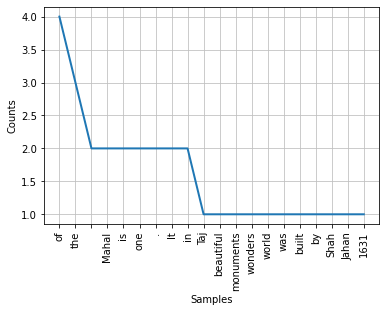

In [26]:
#create freq dist plot
import matplotlib.pyplot as plt

fdist.plot(20, cumulative=False)
plt.show()

In [27]:
#removing stop-words
#import nltk stopwords
from nltk.corpus import stopwords

#load english stopwords list
stopwords_set = set(stopwords.words("english"))

#removing stopwords from text
filtered_word_list = []

for word in tokenized_words:
    if word not in stopwords_set:
        filtered_word_list.append(word)
#print tokenized words
print("Tokenized word list:", tokenized_words)
print("Filtered word list:", filtered_word_list)

Tokenized word list: ['\n', 'Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '\n']
Filtered word list: ['\n', 'Taj', 'Mahal', 'one', 'beautiful', 'monuments', '.', 'It', 'one', 'wonders', 'world', '.', 'It', 'built', 'Shah', 'Jahan', '1631', 'memory', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '\n']


In [28]:
#remove stopwords using spacy
import spacy
nlp = spacy.load('en_core_web_sm')

paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal"""

#create nlp obj
my_doc = nlp(paragraph)

#remove stopwords in para
filtered_token_list = []
for token in my_doc:
    if token.is_stop==False:
        filtered_token_list.append(token)
print("Filtered word List:", filtered_token_list)

Filtered word List: [Taj, Mahal, beautiful, monuments, ., wonders, world, ., built, Shah, Jahan, 1631, memory, beloved, wife, Mumtaj, Mahal]


# Stemming and Lemmatization

In [29]:
#import lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer

#import Porter Stemmer
from nltk.stem.porter import PorterStemmer

#create lemmatizer obj
lemmatizer = WordNetLemmatizer()
#create stemmer obj
stemmer = PorterStemmer()

#take a sample word
sample_word = "crying"
print("Lemmatized sample word:", lemmatizer.lemmatize(sample_word, "v"))
print("Stemmed sample word:", stemmer.stem(sample_word))


Lemmatized sample word: cry
Stemmed sample word: cri


In [30]:
#lemmatized using spacy
import spacy
nlp = spacy.load("en_core_web_sm")

words = nlp("cry cries crying")

#find lemmatized word
for w in words:
    print('Original words:', w.text)
    print('Limmatized words:', w.lemma_)

Original words: cry
Limmatized words: cry
Original words: cries
Limmatized words: cry
Original words: crying
Limmatized words: cry


# pos tagging

In [2]:
#findng pos tag using nltk
#import word tokenizer and pos tagger

from nltk.tokenize import word_tokenize
from nltk import pos_tag

#sample sentence
sentence = "Taj Mahal is one of the beautiful monument."
#tokenize the sentence
sent_tokens = word_tokenize(sentence)

#create pos tag
sent_pos = pos_tag(sent_tokens)

print(sent_pos)


[('Taj', 'NNP'), ('Mahal', 'NNP'), ('is', 'VBZ'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('beautiful', 'JJ'), ('monument', 'NN'), ('.', '.')]


In [33]:
#pos tagging with spacy
import spacy
nlp = spacy.load("en_core_web_sm")

sentence = nlp( u"Taj Mahal is one of the beautiful monument.")
for token in sentence:
    print(token.text, token.pos_)

Taj PROPN
Mahal PROPN
is AUX
one NUM
of ADP
the DET
beautiful ADJ
monument NOUN
. PUNCT


# Reconizing entities


In [3]:
#name entity recognition
import spacy
nlp = spacy.load("en_core_web_sm")
paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

doc = nlp(paragraph)
entities = [(i.text, i.label_) for i in doc.ents]
print(entities)

[('Taj Mahal', 'ORG'), ('Shah Jahan', 'PERSON'), ('1631', 'DATE'), ('third', 'ORDINAL'), ('Mumtaj Mahal', 'PERSON')]


In [4]:
#visualize
from spacy import displacy
displacy.render(doc, style = "ent", jupyter = True)

# Dependency parsing

In [5]:
import spacy
nlp = spacy.load("en_core_web_sm")
docs = nlp(paragraph)
displacy.render(docs, style= "dep", jupyter = True, options={'distance': 150})

# Word Cloud

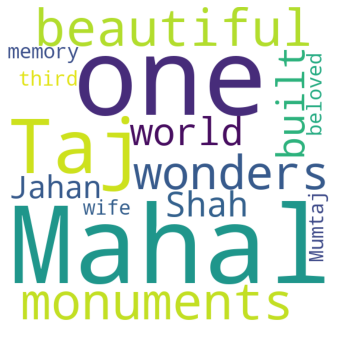

In [8]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

stopword_list = set(STOPWORDS)

paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

#create and generate wordcloud
word_cloud = WordCloud(width = 550, height = 550,
                      background_color = 'white',
                      stopwords = stopword_list,
                      min_font_size = 10).generate(paragraph)

#visual the word cloud
#set wordcloud figure size
plt.figure(figsize = (8, 6))
#show image
plt.imshow(word_cloud)
#remove axis
plt.axis("off")
#show plot
plt.show()


# Bag of Words (BoW)
# TF - IDF
# Sentiment analysis using text classification
# classification using BoW

In [9]:
#load dataset
import pandas as pd
df = pd.read_csv('datasets/amazon_alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


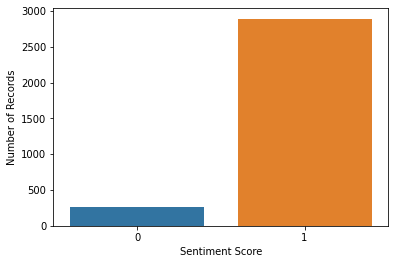

In [10]:
#explore dataset
#to see feedback columns how many posit nega reviews
import seaborn as sns
import matplotlib.pyplot as plt

#count plot
sns.countplot(x="feedback", data=df)

#set x axis and y axis labels
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Records')

#show plot
plt.show()

In [11]:
#generating features using CountVectorizer
#import CountVectorizer and RegepxTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

#create Regex tokenizer for removing special symbols and numeric values
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

#initialize COuntVectorizer obj
count_vectorizer = CountVectorizer(lowercase=True, stop_words='english',
                                  ngram_range = (1, 1),
                                  tokenizer = regex_tokenizer.tokenize)
count_vectors = count_vectorizer.fit_transform(df['verified_reviews'])

In [13]:
#split train and test set
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(count_vectors, df['feedback'], test_size = 0.3, random_state=1)



In [15]:
#classification using logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(feature_train, target_train)
predictions = logreg.predict(feature_test)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Logistic regression model Accuracy:", accuracy_score(predictions, target_test))
print("Logistic regression model Precision:", precision_score(predictions, target_test))
print("Logistic regression model Recall:", recall_score(predictions, target_test))
print("Logistic regression model F1-score:", f1_score(predictions, target_test))


Logistic regression model Accuracy: 0.9428571428571428
Logistic regression model Precision: 0.9873853211009175
Logistic regression model Recall: 0.952433628318584
Logistic regression model F1-score: 0.9695945945945945


# Classification using TF-IDF

In [20]:
#load the dataset
import pandas as pd

df = pd.read_csv("datasets/amazon_alexa.tsv", sep="\t")
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [23]:
#generating tf-idf vectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

#removing special and numeric values
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tfidf = TfidfVectorizer(lowercase=True,
                       stop_words = 'english',
                       ngram_range = (1, 1),
                       tokenizer = regex_tokenizer.tokenize)
#fit and transform
text_tfidf = tfidf.fit_transform(df['verified_reviews'])

In [24]:
#split train and test sets
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(
text_tfidf, df['feedback'], test_size = 0.3, random_state = 1)

In [32]:
#import logistic regression to classify the review sentiment using tf-idf
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver="lbfgs")
logreg.fit(feature_train, target_train)
predictions = logreg.predict(feature_test)

In [33]:
#import materics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Logistic Regression Model Accuracy:", accuracy_score(predictions, target_test))
print("Logistic Regression Model Precision:", precision_score(predictions, target_test))
print("Logistic Regression Model Recall:", recall_score(predictions, target_test))
print("Logistic Regression Model F1-score:", f1_score(predictions, target_test))

Logistic Regression Model Accuracy: 0.9238095238095239
Logistic Regression Model Precision: 1.0
Logistic Regression Model Recall: 0.923728813559322
Logistic Regression Model F1-score: 0.960352422907489


# Text similarity

In [34]:
# import spacy
import spacy

#load english model for tokenizer, tagger, parser, and NER
nlp = spacy.load("en_core_web_sm")

#create documents
doc1 = nlp(u"I love pets.")
doc2 = nlp(u"I hate pets.")

#find similarity
print(doc1.similarity(doc2))

0.9570689064727947


C:\Users\acer\AppData\Local\Temp/ipykernel_7240/524938888.py:12: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(doc1.similarity(doc2))


# Jaccard similarity


In [37]:
def jaccard_similarity(sent1, sent2):
    """ Find text similarity using jaccard similarity """
    #tokenize sentences
    token1 = set(sent1.split())
    token2 = set(sent2.split())
    #intersection between tokens of two sentences
    intersection_tokens = token1.intersection(token2)
    #union between tokens of two sentences
    union_tokens = token1.union(token2)
    #cosine similarity
    sim_ = float(len(intersection_tokens) / len(union_tokens))
    return sim_
jaccard_similarity('I love the way you are', 'I long the way you think')

0.5

In [40]:
# cosine similarity using scikit learn
from sklearn.feature_extraction.text import TfidfVectorizer
docs = ['I love pets', 'I hate pets']
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform(docs)

#import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(tfidf_vectors, tfidf_vectors)
print(cos_sim)

[[1.         0.33609693]
 [0.33609693 1.        ]]
